# Desafio Data Science
**Felipe Eduardo Gomes**\
**Senior Sistemas S/A**

---

**1) Problema:** \
A quantidade de spams (mensagens não solicitadas) que recebemos diariamente, não para de crescer. Os tipos de spam são diversos: anúncios de produtos / web sites, esquemas para ganhar dinheiro rápido, correntes, pornografia e etc.

\

**2) Input:** \
O arquivo [sms_senior.csv](https://github.com/SeniorSA/seniorlabs-challenge/blob/main/sms_senior.csv) contém vários exemplos de mensagens comuns (4827 unidades) e mensagens spams (747 unidades). As mensagens foram submetidas a uma etapa de mineração de texto, com o objetivo de identificar as palavras mais frequentes na base de dados.

Seguem as informações dos atributos do arquivo:

* 1 coluna contendo a mensagem original (Full_Text);
* 149 colunas com valores inteiros que indicam a frequência de uma determinada palavra na mensagem ("got"... "wan");
* 1 coluna contendo a quantidade de palavras frequentes na mensagem (Common_Words_Count);
* 1 coluna contendo a quantidade total de palavras da mensagem (Word_Count);
* 1 coluna contendo a data de recebimento da mensagem (Date);
* 1 coluna que identifica se a mensagem é spam ou não (IsSpam).

\

**3) Primeira Etapa:**
A primeira etapa do seu trabalho consiste em extrair estatísticas desta base de dados:

1. Exibir gráfico as palavras mais frequentes em toda a base de dados (Ex.: 
gráfico de barras, nuvem de palavras, etc).
2. Exibir gráfico com as quantidades de mensagens comuns e spams para cada mês;
3. Calcular o máximo, o mínimo, a média, a mediana, o desvio padrão e a variância da quantidade total de palavras (Word_Count) para cada mês;
4. Exibir o dia de cada mês que possui a maior sequência de mensagens comuns (não spam).

\

**4) Segunda Etapa:**
A segunda etapa consiste em aplicar um método capaz de classificar automaticamente as mensagens como “comum” e “spam”. Como você considera os resultados encontrados? Justifique.

\

**5) Output:**
Você pode utilizar qualquer linguagem de programação e ferramentas de software para extrair as informações das duas etapas do trabalho. Por fim, descreva o trabalho realizado em um artigo.

Lembre-se de apontar as estatísticas extraídas e de explicar o método de classificação utilizado, como a etapa de treinamento e classificação foram executadas, além dos resultados que foram encontrados.

O modelo parece grande, mas você pode ser bem objetivo. Os códigos fontes ou arquivos utilizados no trabalho deverão ser postados no github, onde o README deve explicar como proceder para executar sua solução.

---



## Importação das bibliotecas

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import string
from wordcloud import WordCloud 
import nltk
from nltk.corpus import stopwords
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Descrição do dataset

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
df_sms = pd.read_csv('https://raw.githubusercontent.com/gomesfg/seniorlabs-challenge-data-science/main/sms_senior.csv', sep=',', encoding= 'unicode_escape')
df_sms.head()

,Full_Text,got,great,wat,free,text,txt,win,already,dun,say,around,dont,think,back,hey,like,now,send,still,even,friends,per,call,claim,customer,prize,mobile,gonna,home,ive,soon,today,tonight,want,cash,reply,urgent,week,won,help,right,take,will,wont,message,next.,make,name,yes,feel,thats,way,miss,going,try,first,lor,can,meet,getting,just,lol,really,always,love,amp,ill,know,let,work,sure,wait,yeah,anything,tell,please,thanks,msg,see,pls,need,nokia,tomorrow,hope,ltgt,well,didnt,get,ask,cant,time,morning,place,give,happy,sorry,new,find,year,later,pick,good,come,nice,said,day,money,babe,something,waiting,much,stop,one,late,night,someone,guaranteed,service,buy,box,yet,youre,dear,life,people,cos,things,contact,last,went,sent,chat,gud,thk,keep,also,coming,every,told,sleep,care,mins,phone,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam
0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,12,2017-01-01 00:08:00,no
1,"came to look at the flat, seems ok, in his 50s...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,23,2017-01-01 00:19:00,no
2,Urgent! call 09061749602 from Landline. Your c...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,25,2017-01-01 01:53:00,yes
3,Do you hide anythiing or keeping distance from me,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,2017-01-01 02:14:00,no
4,"Actually, my mobile is full of msg. And i m do...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,29,2017-01-01 02:25:00,no


In [6]:
# Utilização do LabelEncoder da biblioteca sklearn para transformar a feature "IsSpam" de categórico para numérico.
# {'no': 0, 'yes': 1}
le = LabelEncoder()
df_sms['IsSpam_numeric']=le.fit_transform(df_sms['IsSpam'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'no': 0, 'yes': 1}


In [7]:
# Adicionando feature "Month" e "Month_Description" ao dataset
df_sms['Month'] = pd.DatetimeIndex(df_sms['Date']).month
df_sms['Month_Description'] = pd.DatetimeIndex(df_sms['Date']).month_name()

## Distribuição estatística dos dados
Ao realizar uma análise do dataset, podemos observar abaixo que se trata de uma matriz de 5574 linhas e 157 colunas, sendo 153 features do tipo int64 e 4 do tipo object.

In [9]:
df_sms.info()
print(df_sms.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Columns: 157 entries, Full_Text to Month_Description
dtypes: int64(153), object(4)
memory usage: 6.7+ MB
(5574, 157)


Realizei a pesquisa para ver se encontrava atributos com dados faltantes (missing values) ou atributos com dados incorretos, porém todos estavam com valores preenchidos.

In [10]:
df_sms.isna().sum()

Full_Text            0
got                  0
great                0
wat                  0
free                 0
text                 0
txt                  0
win                  0
already              0
dun                  0
say                  0
around               0
dont                 0
think                0
back                 0
hey                  0
like                 0
now                  0
send                 0
still                0
even                 0
friends              0
per                  0
call                 0
claim                0
customer             0
prize                0
mobile               0
gonna                0
home                 0
ive                  0
soon                 0
today                0
tonight              0
want                 0
cash                 0
reply                0
urgent               0
week                 0
won                  0
help                 0
right                0
take                 0
will       

Foi utilizado o método .describe() para criar um resumo básico das principais informações do Dataframe, assim fornecendo uma visão geral das variáveis numéricas.

In [11]:
df_sms.describe()

,got,great,wat,free,text,txt,win,already,dun,say,around,dont,think,back,hey,like,now,send,still,even,friends,per,call,claim,customer,prize,mobile,gonna,home,ive,soon,today,tonight,want,cash,reply,urgent,week,won,help,right,take,will,wont,message,next.,make,name,yes,feel,thats,way,miss,going,try,first,lor,can,meet,getting,just,lol,really,always,love,amp,ill,know,let,work,sure,wait,yeah,anything,tell,please,thanks,msg,see,pls,need,nokia,tomorrow,hope,ltgt,well,didnt,get,ask,cant,time,morning,place,give,happy,sorry,new,find,year,later,pick,good,come,nice,said,day,money,babe,something,waiting,much,stop,one,late,night,someone,guaranteed,service,buy,box,yet,youre,dear,life,people,cos,things,contact,last,went,sent,chat,gud,thk,keep,also,coming,every,told,sleep,care,mins,phone,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,IsSpam_numeric,Month
count,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.00000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000
mean,0.043057,0.019914,0.017223,0.049874,0.033907,0.029243,0.013097,0.016146,0.009867,0.016505,0.010944,0.052386,0.023681,0.027269,0.019914,0.043775,0.085935,0.034266,0.027628,0.011302,0.010405,0.010585,0.104234,0.020273,0.010405,0.016505,0.024937,0.010405,0.029064,0.013455,0.010585,0.025296,0.010764,0.034625,0.013276,0.025834,0.011661,0.020811,0.013097,0.010585,0.016505,0.022605,0.068712,0.010047,0.014891,0.011123,0.018120,0.009150,0.016505,0.011123,0.017761,0.018120,0.014173,0.030678,0.009150,0.011123,0.028705,0.072659,0.013994,0.008970,0.066021,0.013097,0.015429,0.010226,0.035881,0.015070,0.042878,0.046107,0.012558,0.017940,0.012738,0.010585,0.015429,0.013455,0.024578,0.023502,0.013635,0.014891,0.028166,0.019555,0.029961,0.012917,0.016146,0.018658,0.049516,0.024220,0.014532,0.069968,0.015788,0.022426,0.037316,0.013814,0.010585,0.018479,0.019196,0.027987,0.024399,0.013097,0.008970,0.024040,0.012738,0.042339,0.041084,0.010226,0.015608,0.038034,0.010226,0.013814,0.012199,0.009508,0.020273,0.027808,0.030678,0.010047,0.020632,0.010764,0.008970,0.010585,0.011661,0.009508,0.008970,0.009688,0.020273,0.014173,0.008970,0.013635,0.009508,0.012199,0.013994,0.010944,0.012199,0.010226,0.011482,0.00897,0.012199,0.012738,0.008970,0.013097,0.009508,0.010047,0.012199,0.008970,0.022605,0.016

Frequência de spams

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


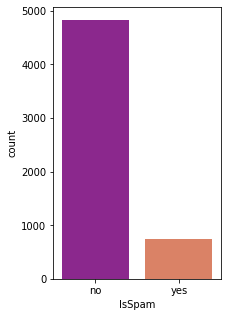

In [12]:
plt.figure(figsize=(3,5))
sns.countplot(df_sms['IsSpam'], order =df_sms.IsSpam.value_counts().index,palette= 'plasma')
plt.show()

# Primeira Etapa

Funções

In [13]:
def process_text(text):
  # Remover stopwords e pontuação
  stw = set(stopwords.words("english")+ list(string.punctuation))
  cleaned_text = [word for word in text.split() if word not in stw]
  cleaned_text

  return cleaned_text

In [14]:
def plot_cloud(frequencies):
  wordcloud = WordCloud(max_font_size=50, max_words=100).generate_from_frequencies(frequencies)
  plt.figure(1,figsize=(12, 12))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [15]:
df_sms['formatted_text'] = df_sms['Full_Text']

In [16]:
df_sms['formatted_text'].apply(process_text)

0       [Hey!, Congrats, 2u2., id, luv, 2, ive, 2, go,...
1       [came, look, flat,, seems, ok,, 50s?, Is, away...
2       [Urgent!, call, 09061749602, Landline., Your, ...
3                [Do, hide, anythiing, keeping, distance]
4       [Actually,, mobile, full, msg., And, work, onl...
5          [Please, leave, topic..sorry, telling, that..]
6          [No,, true..k,Do, u, knw, dis, no., &lt;#&gt;]
7       [important, information, 4, orange, user, toda...
8       [Hello,, love., What, doing?, Did, get, interv...
9       [I, know, need, get, hotel, now., I, got, invi...
10      [A, pure, hearted, person, wonderful, smile, m...
11      [U, meet, fren, dun, wan, meet, ah..., Muz, b,...
12      [Oops, mum's, somerset..., Bit, far!, Back, to...
13      [Oic..., I, saw, tot, din, c, me..., I, found,...
14      [Natalja, (25/F), inviting, friend., Reply, YE...
15                     [K..k:)where, you?how, performed?]
16                                      [Not, drop, tank]
17            

In [17]:
# Transformar as features de colunas para linhas e fazer o somatório
df = df_sms.iloc[:, 1:148].reset_index()
df_frequencies = df.drop('index', axis=1).sum().reset_index().sort_values(by=0, ascending=False).rename({'index': 'word', 0: 'quantity'}, axis=1)
df_frequencies_dict = df_frequencies.set_index('word').to_dict()['quantity']

## 1) Exibir gráfico as palavras mais frequentes em toda a base de dados (Ex.: gráfico de barras, nuvem de palavras, etc).

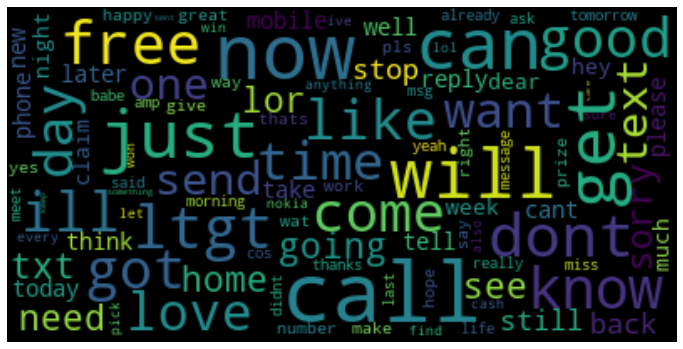

In [18]:
plot_cloud(df_frequencies_dict)

Podemos observar que as cinco palavras que mais aparecem são "call", "now", "can", "get" e "will".

In [21]:
df_frequencies.head(5)

,word,quantity
22,call,581
16,now,479
57,can,405
87,get,390
42,will,383


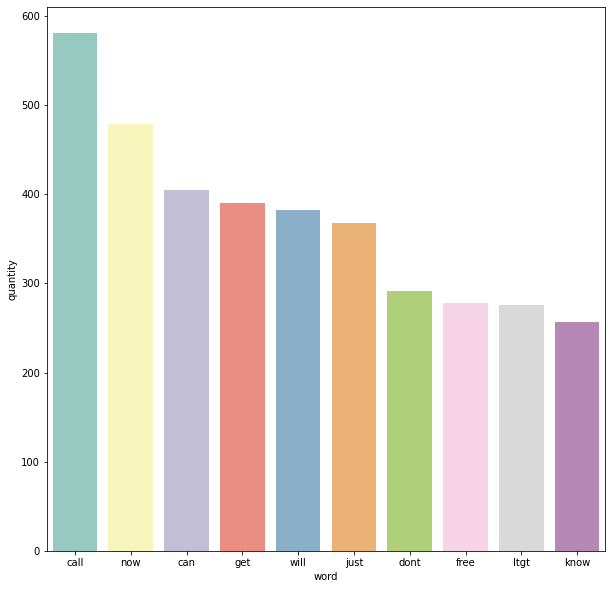

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_frequencies.head(10), x='word', y='quantity', palette='Set3')
plt.show()

## 2) Exibir gráfico com as quantidades de mensagens comuns e spams para cada mês;

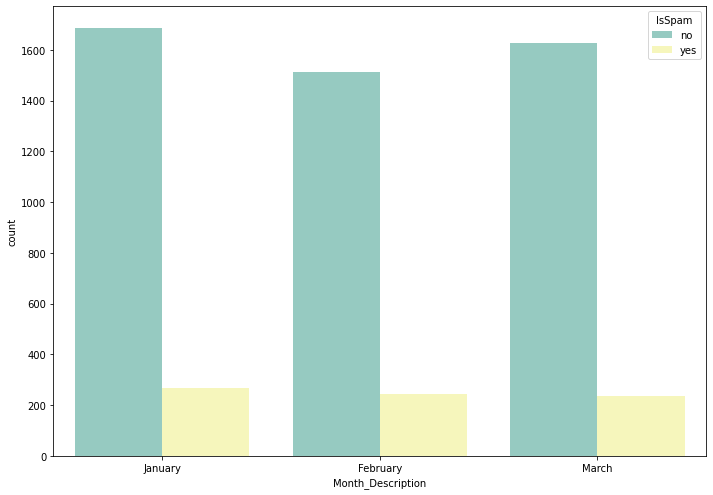

--------------------------------------------------
Janeiro
Spam: 266 mensagens.
Não Spam: 1687 mensagens.
--------------------------------------------------
Fevereiro
Spam: 244 mensagens.
Não Spam: 1512 mensagens.
--------------------------------------------------
Março
Spam: 237 mensagens.
Não Spam: 1628 mensagens.
--------------------------------------------------


In [28]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.countplot(x='Month_Description', hue='IsSpam', palette = "Set3", data=df_sms);
plt.show()

print('-' * 50)
print('Janeiro')
print('Spam:',df_sms.loc[(df_sms['Month'] == 1) & (df_sms['IsSpam_numeric'] == 1)].value_counts().sum(),'mensagens.')
print('Não Spam:',df_sms.loc[(df_sms['Month'] == 1) & (df_sms['IsSpam_numeric'] == 0)].value_counts().sum(),'mensagens.')
print('-' * 50)
print('Fevereiro')
print('Spam:',df_sms.loc[(df_sms['Month'] == 2) & (df_sms['IsSpam_numeric'] == 1)].value_counts().sum(),'mensagens.')
print('Não Spam:',df_sms.loc[(df_sms['Month'] == 2) & (df_sms['IsSpam_numeric'] == 0)].value_counts().sum(),'mensagens.')
print('-' * 50)
print('Março')
print('Spam:',df_sms.loc[(df_sms['Month'] == 3) & (df_sms['IsSpam_numeric'] == 1)].value_counts().sum(),'mensagens.')
print('Não Spam:',df_sms.loc[(df_sms['Month'] == 3) & (df_sms['IsSpam_numeric'] == 0)].value_counts().sum(),'mensagens.')
print('-' * 50)


## 3) Calcular o máximo, o mínimo, a média, a mediana, o desvio padrão e a variância da quantidade total de palavras (Word_Count) para cada mês;

In [29]:
df_sms.groupby('Month_Description')['Word_Count'].agg(['max', 'min', 'mean', 'median', 'std', 'var']).T

Month_Description,February,January,March
max,100.000000,190.000000,115.000000
min,2.000000,2.000000,2.000000
mean,16.029043,16.336918,16.285255
median,13.000000,13.000000,12.000000
std,11.042459,12.557171,11.576213
var,121.935908,157.682535,134.008715


## 4) Exibir o dia de cada mês que possui a maior sequência de mensagens comuns (não spam).

In [30]:
df = df_sms.loc[(df_sms['IsSpam_numeric'] == 0)]
df = df.groupby(['Month_Description',pd.to_datetime(df_sms['Date']).dt.normalize()])['Full_Text'].count().reset_index()
df.set_index('Date').groupby('Month_Description')['Full_Text'].agg(['idxmax', 'max']).reset_index().rename({'Month_Description': 'Mês', 'idxmax': 'Dia', 'max':'Quantidade'}, axis=1)

,Mês,Dia,Quantidade
0,February,2017-02-13,72
1,January,2017-01-01,69
2,March,2017-03-08,69


# Segunda etapa

## Modelagem

##TO-DO